# <center>Computational Physics</center>

# <center>Midterm Exam 2019-2020-2</center>

## Instructions:
- Please downloand the `CP_midexam_2019-2020-2.pdf` and `CP_name_ID_midexam.ipynb`. 
- You shall include the **code** of the selected problems in the file and submit it before the due time.
- You are required to write your name and student ID in the **filename**.
- Please read the problems carefully and follow the instructions before you start to solve them. 
- Please write your solutions on the exam paper and submit the copy of it before the due time. You are required to **write your name and student ID on each piece of exam paper**.
- You are required to turn on your video throughout the exam.

### Problem 1   (20 points) 

The value of $\pi$ can be calculated with the series: 
$$
    \pi = 4 \sum\limits_{n=1}^{\infty}\left(-1\right)^{n-1}\frac{1}{2n - 1}=4\left(
    1-\frac{1}{ 3}+\frac{1}{ 5}-\frac{1}{ 7}+\frac{1}{9}-\frac{1}{11}+\cdots\right)
$$
    (1) Describe your algorithm that calculates the value of  $\pi$ . Discuss the possible  sources of errors. How can you minimize the errors when you design your algorithm?      
    (2) Write a program to implement your algorithm and calculate the value of $\pi$ with five decimal points.      
    (3) Use the program to calculate $\pi$ and the true relative error for: $n = 10, 20, 40,100, 200$.     
    (4) Make a $\log-\log$ plot of the results from part (3).     
    **You need to submit your code for part (2) - (4)!**

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.linalg import solve

In [2]:
# Question (2)
eps = 10 ** (-10)
pi = np.array((1.1,0))
i = 1
while abs(pi[0] - pi[1]) > eps:
    pi[0] = pi[1]
    pi [1] += 8 / (4 * i ** (2) - 1)
    i += 2
print(f'pi = {pi[1]:0.4f}')

pi = 3.1416


In [3]:
# Question (3)
def true_relative_error(n):
    eps = 10 ** (-10)
    pi = np.array((1.1,0))
    true_pi = np.pi
    i = 1
    while i <= n  :
        pi[0] = pi[1]
        pi [1] += 8 / (4 * i ** (2) - 1)
        i += 2
    tre = abs(pi[1] - true_pi) / true_pi  * 100
    return tre
print(f'When n = 10 true_relative_error is {true_relative_error(10):.4f}%')
print(f'When n = 20 true_relative_error is {true_relative_error(20):.4f}%')
print(f'When n = 40 true_relative_error is {true_relative_error(40):.4f}%')
print(f'When n = 100 true_relative_error is {true_relative_error(100):.4f}%')
print(f'When n = 200 true_relative_error is {true_relative_error(200):.4f}%')

When n = 10 true_relative_error is 3.1752%
When n = 20 true_relative_error is 1.5906%
When n = 40 true_relative_error is 0.7957%
When n = 100 true_relative_error is 0.3183%
When n = 200 true_relative_error is 0.1592%


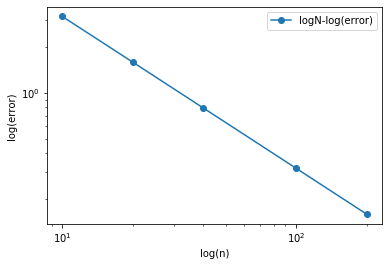

In [4]:
# Question (4)
n = np.array(([10,20,40,100,200]))
tre = np.zeros((5,))
for i in range(5):
    tre[i] = true_relative_error(n[i])
plt.loglog(n,tre,'-o',label='logN-log(error)')
plt.xlabel('log(n)')
plt.ylabel('log(error)')
plt.legend()
plt.show()

### Problem 2 (10 points) 
Consider a linear $2\times 2$ system (with unknowns $x_1$ and $x_2$) described by
$$
    \begin{pmatrix}
    \varepsilon & 1\\
    1 & 1
    \end{pmatrix}
    \begin{pmatrix}
    x_1\\x_2\end{pmatrix}
    =\begin{pmatrix}
    2\\
    1
    \end{pmatrix}
$$
    where $\epsilon > 0$ is a very small constant.   
    (1) Solve by Gauss elimination without partial pivoting by hand.   
    (2) Solve by Gauss elimination with partial pivoting by hand.    
    (3) Compare the results and discuss their validity.  

#### Question (1)
Here we have 
$$
\epsilon x_1 + x_2 = 2\\
x_1 + x_2 = 1
$$
Then we can get
$$
(1 - \frac{1}{\epsilon})x_2 = 1 - \frac{2}{\epsilon}\\
x_2 = 1 + \frac{1}{1 - \epsilon}\\
x_1 = \frac{2 - x_2}{\epsilon}
$$
Then we will use code to test the answer.

In [5]:
# define the test values (for epsilon)
test_values = np.ones((10,))
for i in range(10):
    test_values[i] = 1. * 10 ** (-i - 1)

In [6]:
x1 = np.ones((10,))
x2 = np.ones((10,))
print('x1\t\t\tx2')
for i in range(10):
    x2[i] = 1 + 1 / (1 - test_values[i])
    x1[i] = (2 - x2[i]) / test_values[i]
    print(f'{x1[i]:<20}\t{x2[i]:<20}')

x1			x2
-1.1111111111111116 	2.111111111111111   
-1.0101010101010388 	2.0101010101010104  
-1.0010010010010895 	2.001001001001001   
-1.0001000099979507 	2.000100010001      
-1.0000100000961964 	2.000010000100001   
-1.0000010002286785 	2.0000010000010002  
-1.0000001005039394 	2.00000010000001    
-0.999999993922529  	2.00000001          
-1.000000082740371  	2.000000001         
-1.000000082740371  	2.0000000001        


#### Question (2)
<font size = 4 color = black face = "Times New Roman">Here we have 
$$
x_1 + x_2 = 1\\

\epsilon x_1 + x_2 = 2\\
$$
Then we can get
$$
(1 - \epsilon)x_2 = 2 - \epsilon\\
x_2 = 1 + \frac{1}{1 - \epsilon}\\
x_1 = 1 - x_2
$$
<font size = 4 color = black face = "Times New Roman">Then we will use code to test the answer.

In [7]:
print('x1\t\t\tx2')
for i in range(10):
    x2[i] = 1 + 1 / (1 - test_values[i])
    x1[i] = 1 - x2[i]
    print(f'{x1[i]:<20}\t{x2[i]:<20}')

x1			x2
-1.1111111111111112 	2.111111111111111   
-1.0101010101010104 	2.0101010101010104  
-1.001001001001001  	2.001001001001001   
-1.0001000100009998 	2.000100010001      
-1.000010000100001  	2.000010000100001   
-1.0000010000010002 	2.0000010000010002  
-1.00000010000001   	2.00000010000001    
-1.00000001         	2.00000001          
-1.000000001        	2.000000001         
-1.0000000001       	2.0000000001        


#### Question 3
<font size = 3 color = black face = "Times New Roman">Comparing the two methods, it is not difficult to see that the results of the second method are more accurate. In addition, the use of the second method can avoid the error caused by the very small value of epsilon. Because it doesn't have to divide into epsilon in the calculation.

### Problem 3 (20 points)   
Halley's method to find the solution to a equation of single variable is given as
$$
    x_{n+1}=x_{n}-\frac{2f(x_n)f^\prime(x_n)}{2(f^\prime(x_n))^2-f(x_n)f^{\prime\prime}(x_n)}
$$
    Apply Halley's method to solve $f(x)=e^{x-3}+x-2$.   
    (1) Show that Halley's method has an order of convergence 3 for simple zero.    
    (2) Make a sketch of the function $f(x)$ on paper.    
    (3) Write the code to determine the root numerically and count the steps of iterations. The predefined tolerance is given as $\left\vert x_{i+1}-x_i\right\vert\leq 0.5e-8$.      
    (4) Write your results of part (3) on paper.     
    (5) What are the advantages and disadvantages of Halley's method, when you compare it to the Newton's method and the bisection method?    
    **You need to submit your code of part (3)!**

In [8]:
### Question (3)

In [9]:
def f(x):
    return np.exp(x-3) + x - 2

def f_1(x):
    return np.exp(x-3) + 1

def f_2(x):
    return np.exp(x-3)

In [10]:
def Halley_method(f,f_1,f_2,x0,eps = 0.5e-8):
    count = 0
    x1 = x0 + 1. 
    while abs(x1 - x0)>eps:
        count += 1
        x0 = x1
        x1 = x0 - 2 * f(x0) * f_1(x0) / (2 * f_1(x0) ** 2 - f(x0) * f_2(x0) )
    return x1, count

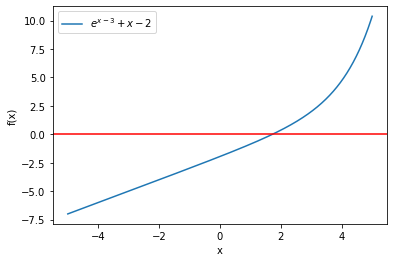

In [11]:
x = np.arange(-5,5,0.001)
y = f(x)
plt.plot(x,y,label=r'$e^{x-3}+x-2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(y = 0,color = 'red')
plt.legend()
plt.show()

In [12]:
x0 = 1.0
root,count = Halley_method(f,f_1,f_2,x0)
print(f'root = {root}\ncount = {count}')

root = 1.721535457238926
count = 3


Question 5

Halley's method converges faster than Newton's method and bisection method, however, when we use Halley's method, we need to know the first and second derivatives, which is a little tricky to calculate

### Problem 4 (20 points)
Consider the following equations corresponding to measurements of two unknown quantities $(x_1,x_2)$
$$
    \begin{aligned}
        7x_1 −3x_2& = 5\\
    −2x_1 + 5x_2 &= −10\\
        3x_1 &= 8
    \end{aligned}
$$
    where $x_1$ and $x_2$ are scalars.   
    (1) Write these equations as a single matrix-vector equation.       
    (2) What `python` package will you apply to determine the least-squares solution?  Please write your code and the results on the paper.   
    (3) What numerical method will you apply to determine the least-squares solution? Please describe your method briefly and write the corresponding pseudocode on the paper.   
    (4) When you plug your solution into the equations, are any of the equalities satisfied? Why or why not?  

In [13]:
# question 2
import numpy as np
A = np.array(([7,-3],[-2,5],[3,0]))
b = np.array(([5],[-10],[8]))
q,r = np.linalg.qr(A)
p = np.dot(q.T,b)
x = np.dot(np.linalg.inv(r),p)
print(f'x1 = {x[0][0]}\nx2 = {x[1][0]}')

x1 = 0.5850043591979078
x2 = -1.3783783783783778


In [14]:
# question 4
test_b = np.dot(A,x)
test_b

array([[ 8.23016565],
       [-8.06190061],
       [ 1.75501308]])

### Problem 5 (15 points)    
It is required to fit a regression model of the form $z =f (x,y)$ to the following data:
  
   |   |   |   |   |   |  |  |  |  |   |
   | ---- | ----- | ----- | ----- | ---- | ---- | ---- | ---- | ---- | ---- |
     | $x$  | 0.5   | 1.0   | 1.0   | 2.0  | 2.5  | 2.0  | 3.0  | 3.5  | 4.0  |
   | $y$  | 2.0   | 4.0   | 5.0   | 2.0  | 4.0  | 5.0  | 2.0  | 4.0  | 5.0  |
   | $z$  | -0.19 | -0.32 | -1.00 | 3.71 | 4.49 | 2.48 | 6.31 | 7.71 | 9.51 |
   (1) Describe the algorithm of normal equations to generate a model of the form $z =a+bx+cy$
   (2) Derive the symmetrical matrix $A$ and the vector $b$ based on part (1) and write the results.
   (3) Use `python` package to determine the numerical solutions of the parameters $a$, $b$ and $c$.  Write your code on paper.  
   (4) Determine the reduced $\chi^2$. Do you consider the model a good fit to the data? Why and why not?

$f(x,y)= a + bx + cy$

<font size = 3 color = black face = "Times New Roman">Then the minimizing $S$ yields is:
$$
S = \sum[z_i - (a + bx_i+cy_i)]^2\\
\frac{\partial S}{\partial a}= - 2 \sum[z_i - (a + bx_i+cy_i)] = 0\\
\frac{\partial S}{\partial b}= - 2 \sum[z_i - (a + bx_i+cy_i)] x_i = 0\\
\frac{\partial S}{\partial c}= - 2 \sum[z_i - (a + bx_i+cy_i)] y_i= 0
$$
<font size = 3 color = black face = "Times New Roman">Hence we are easy to know that
$$
\begin{pmatrix}
n && \sum x_i && \sum y_i\\
\sum x_i && \sum x_i^2 && \sum x_i y_i\\
\sum y_i && \sum x_i y_i && \sum y_i^2\\
\end{pmatrix}
\begin{pmatrix}
a\\
b\\
c\\
\end{pmatrix}
=
\begin{pmatrix}
\sum z_i\\
\sum x_i z_i\\
\sum y_i z_i\\
\end{pmatrix}
$$

In [15]:
import numpy as np
x = np.array([0.5, 1.0, 1.0, 2.0, 2.5, 2.0, 3.0, 3.5, 4.0])
y = np.array([2.0, 4.0, 5.0, 2.0, 4.0, 5.0, 2.0, 4.0, 5.0])
z = np.array([-0.19, -0.32, -1.00, 3.71, 4.49, 2.48, 6.31, 7.71, 9.51])

In [16]:
# Define matrix A.
A = np.zeros((3,3))
A[0][0] = len(x)
A[1][1] = (x**2).sum()
A[2][2] = (y**2).sum()
A[0][1] = A[1][0] = x.sum()
A[0][2] = A[2][0] = y.sum()
A[1][2] = A[2][1] = (x*y).sum()

In [17]:
# Define matrix b
b_matrix = np.array([z.sum(), (x*z).sum(), (y*z).sum()])

In [18]:
a_matrix = np.dot(np.linalg.inv(A),b_matrix)
print(f'a = {a_matrix[0]}\nb = {a_matrix[1]}\nc = {a_matrix[2]}')

a = -1.7238879913839504
b = 3.157059773828758
c = -0.40447495961227986


In [19]:
fitting_value = a_matrix[0] + a_matrix[1] * x + a_matrix[2] * y
freedom = len(z) - 3
reduced_chi_square = ((z - fitting_value)**2).sum() / freedom
print(f'reduced chis_quare is {reduced_chi_square}')

reduced chis_quare is 0.2628257404415725


### Problem 6 (15 points)    
Apply the Newton' method to solve the following nonlinear equations
   $$
   \begin{cases}
   3x_1-\cos(x_2x_3)-3/2=0\\
   4x_1^2 -625 x_2^2+2x_3-1=0\\
   20x_3+e^{-x_1x_1} + 9=0
   \end{cases}
   $$  
   starting with trial values $x_0=(1, 1,1)^T$.       
   (1) Describe the Newton's method for multivariate systems briefly.    
   (2) Determine the analytical expression of the Jacobian matrix.    
   (3) We now start with the first iteration. You are required to calculate the next trial value of $x_1$. Read the following code and find out what numerical method is used here? What would you suggest to make the script more readable?     

In [20]:
def my_function(A):
    l = len(A)
    P = [[0.0] * n for i in xrange(n)]
    Q = [[0.0] * n for i in xrange(n)]
    S = pivot_matrix(A)
    SA = mult_matrix(S, A)
    for j in xrange(n):
        P[j][j] = 1.0
        for i in xrange(j+1):
            s1 = sum(Q[k][j] * P[i][k] for k in xrange(i))
            Q[i][j] = PA[i][j] - s1
        for i in xrange(j, n):
            s2 = sum(Q[k][j] * P[i][k] for k in xrange(j))
            P[i][j] = (SA[i][j] - s2) / Q[j][j]
    return (S, P, Q)

The code is LU decomposition.

In [21]:
def my_function(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    Q = [[0.0] * n for i in range(n)]
    S = pivot_matrix(A)
    SA = mult_matrix(S, A)
    for j in range(n):
        P[j][j] = 1.0
        for i in range(j+1):
            s1 = sum(Q[k][j] * P[i][k] for k in xrange(i))
            Q[i][j] = PA[i][j] - s1
        for i in range(j, n):
            s2 = sum(Q[k][j] * P[i][k] for k in xrange(j))
            P[i][j] = (SA[i][j] - s2) / Q[j][j]
    return (S, L, Q)

I think this code is more readable.